<div >
<img src = "../Machine Learning Aplicado al Marketing-4875-x-834.jpg" />
</div>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ignaciomsarmiento/MALM/blob/main/01_Intro_al_Curso_Python/01_Intro_Pyton.ipynb)

# Segmentación de clientes basada en datos

La segmentación de clientes es fundamental en el marketing moderno, permitiendo:

1. Entender mejor los diferentes comportamientos de los clientes
2. Crear estrategias de marketing más efectivas y personalizadas
3. Optimizar recursos al dirigirse a grupos específicos

## Analisis de clusters


El análisis de clusters es una herramienta poderosa para identificar estos segmentos de mercado, pero presenta algunos desafíos importantes:

- Los datos de consumidores raramente están bien estructurados
- Las preferencias de los clientes suelen distribuirse de forma continua, sin grupos claramente definidos
- El resultado final depende tanto de los datos como del algoritmo seleccionado


<div style="max-width:500px">
    <img src = "figs/plot_clustering_notebook.png" />
</div>


Existen principalmente dos enfoques para el clustering en marketing:
1. Métodos basados en distancia: Agrupan clientes según su similitud
2. Métodos basados en modelos: Utilizan modelos estadísticos para definir los segmentos


En clases anteriores, estudiamos el algoritmo de k-medias, uno de los métodos más populares para la segmentación de clientes. Recordemos que k-medias:

- Agrupa los clientes en un número predefinido (k) de segmentos
- Funciona iterativamente asignando cada cliente al centroide más cercano
- Es intuitivo y fácil de interpretar en contextos de marketing
- Requiere que especifiquemos el número de segmentos de antemano

Sin embargo, k-medias tiene algunas limitaciones:
- Asume que los clusters son circulares o esféricos
- No maneja bien grupos de diferentes tamaños o densidades
- No detecta outliers o casos atípicos

Esto nos lleva a explorar métodos más avanzados como el clustering jerárquico y DBSCAN, que pueden superar algunas de estas limitaciones y ofrecer nuevas perspectivas en la segmentación de clientes.

La clave está en entender que no existe un método "perfecto" - cada algoritmo tiene sus fortalezas y debilidades. La elección del método dependerá de:
- Las características de nuestros datos
- Los objetivos específicos de la segmentación
- Los requisitos del negocio


### Etapas generales

Las etapas del análisis de clusters podemos resumirlas de la siguiente forma:

1. Iniciamos con una matriz de datos

    \begin{align}
X_{n\times k}=\left(\begin{array}{cccc}
x_{11} &  & \dots & x_{1k}\\
\\
\vdots &  & x_{ik} & \vdots\\
\\
x_{n1} &  & \dots & x_{nk} 
\end{array}\right)
    \end{align}

2. Calculamos la matriz de distancia o disimilitud

\begin{align}
D_{n\times n}=\left(\begin{array}{ccccc}
d_{11} &  & \dots &  & d_{1n}\\
 & \ddots\\
\vdots &  & d_{jj} &  & \vdots\\
 &  &  & \ddots\\
d_{n1} &  & \dots &  & d_{nn}
\end{array}\right)
\end{align}


3. Aplicamos el algoritmo de clustering. Existen varios tipos
    - **basados en centroides**
    - **basados en conectividad** 
    - **basados en densidades**
    


## Clustering Jerárquico

- El clustering jerárquico es especialmente útil cuando no existen expectativas sobre los patrones y estructuras subyacentes de los datos.


Los métodos de agrupamiento jerárquico son la forma más intuitiva de agrupar datos porque imitan la forma en que un humano abordaría la tarea de dividir un conjunto de n observaciones (consumidores) en k grupos (segmentos). 
     - Si el objetivo es tener un gran segmento de mercado (k = 1), la única solución posible es un gran segmento de mercado que contenga a todos los consumidores en los datos X. 
     - En el otro extremo, si el objetivo es tener tantos segmentos de mercado como consumidores en el conjunto de datos (k = n), el número de segmentos de mercado tiene que ser n, y cada segmento debe contener exactamente un consumidor.

- Cada consumidor representa su propio grupo. El análisis de segmentación de mercado se produce entre esos dos extremos.



<div >
    <img src = "figs/WallStreet.png" />
</div>


<div >
    <img src = "figs/Harrans.png" />
</div>


- Una característica atractiva es que no es necesario especificar el número de clusers a buscar a priori como en   k-medias 


- Este  mide la conectividad entre las observaciones en algún espacio de características o conjunto de datos. 


- Podemos usar los resultados para visualizar su similitud espacial entre sí en una variedad de niveles, típicamente en forma de dendrograma, que es una estructura similar a un árbol que muestra progresivamente las similitudes entre las observaciones.


- En algunos casos puede informar a los otros métodos de clustering  basados en los patrones revelados. Por ejemplo, si el dendrograma revela dos grupos naturales, entonces una segunda etapa puede inicializar un algoritmo de k-medias con dos conglomerados. Al especificar el algoritmo de k-medias, podríamos comparar directamente la validez interna de ambos algoritmos  para determinar cuál es mejor para agrupar los datos a lo largo de una variedad de dimensiones (p. ej., conectividad, compacidad, etc.). 


- Hay dos tipos de agrupamiento jerárquico: 
  - Los métodos de agrupamiento jerárquico divisivo comienzan con el conjunto de datos completo X y lo dividen en dos segmentos de mercado en un primer paso. Luego, cada uno de los segmentos se divide nuevamente en dos segmentos. Este proceso continúa hasta que cada consumidor tiene su propio segmento de mercado.
  - El agrupamiento jerárquico aglomerativo aborda la tarea desde el otro extremo. El punto de partida es que cada consumidor representa su propio segmento de mercado (n grupos únicos). Paso a paso, los dos segmentos de mercado más cercanos entre sí se fusionan hasta que el conjunto de datos completo forma un gran segmento de mercado.


### Enlaces

- Los algoritmos de clustering jerárquico son únicos en el sentido de que requieren especificar:
 
    - una medida de distancia
    - un método de enlace o vinculación, 


- Por lo tanto, con nuestros datos de distancia estandarizados, podemos ajustar un algoritmo de agrupamiento jerárquico, pero como el algoritmo procede en forma de pares, debemos especificar con precisión cómo se unen estos pares. 




- El método de enlace es el mecanismo para determinar esto y hay muchos métodos de vinculación entre los que elegir:

   - *Enlace simple*: También conocido como técnica del vecino más cercano; en este método combinamos los clusters, basándonos en los dos puntos más cercanos de cada cluster.
   - *Enlace completo (complete linkage - CL)* :  El enlace completo o técnica del vecino más lejano, es lo opuesto al enlace simple y combina los clusters encontrando la distancia máxima entre las observaciones de los clusters
   - *Enlace promedio de grupo (average )* :El enlace promedio de grupo utiliza la mínima distancia promedio entre los grupos. Es decir, calculamos todas las distancias entre pares de ambos clusters, y calculamos el promedio.
  - *Enlace usando centroides (Centroid)* Este método usa la mínima distancia entre los centroides del cluster.
  - *Enlace de Ward*  une los clusters más cercanos entre sí minimizando la varianza dentro de cada grupo, buscando que los elementos dentro de un mismo cluster sean lo más homogéneos posible.

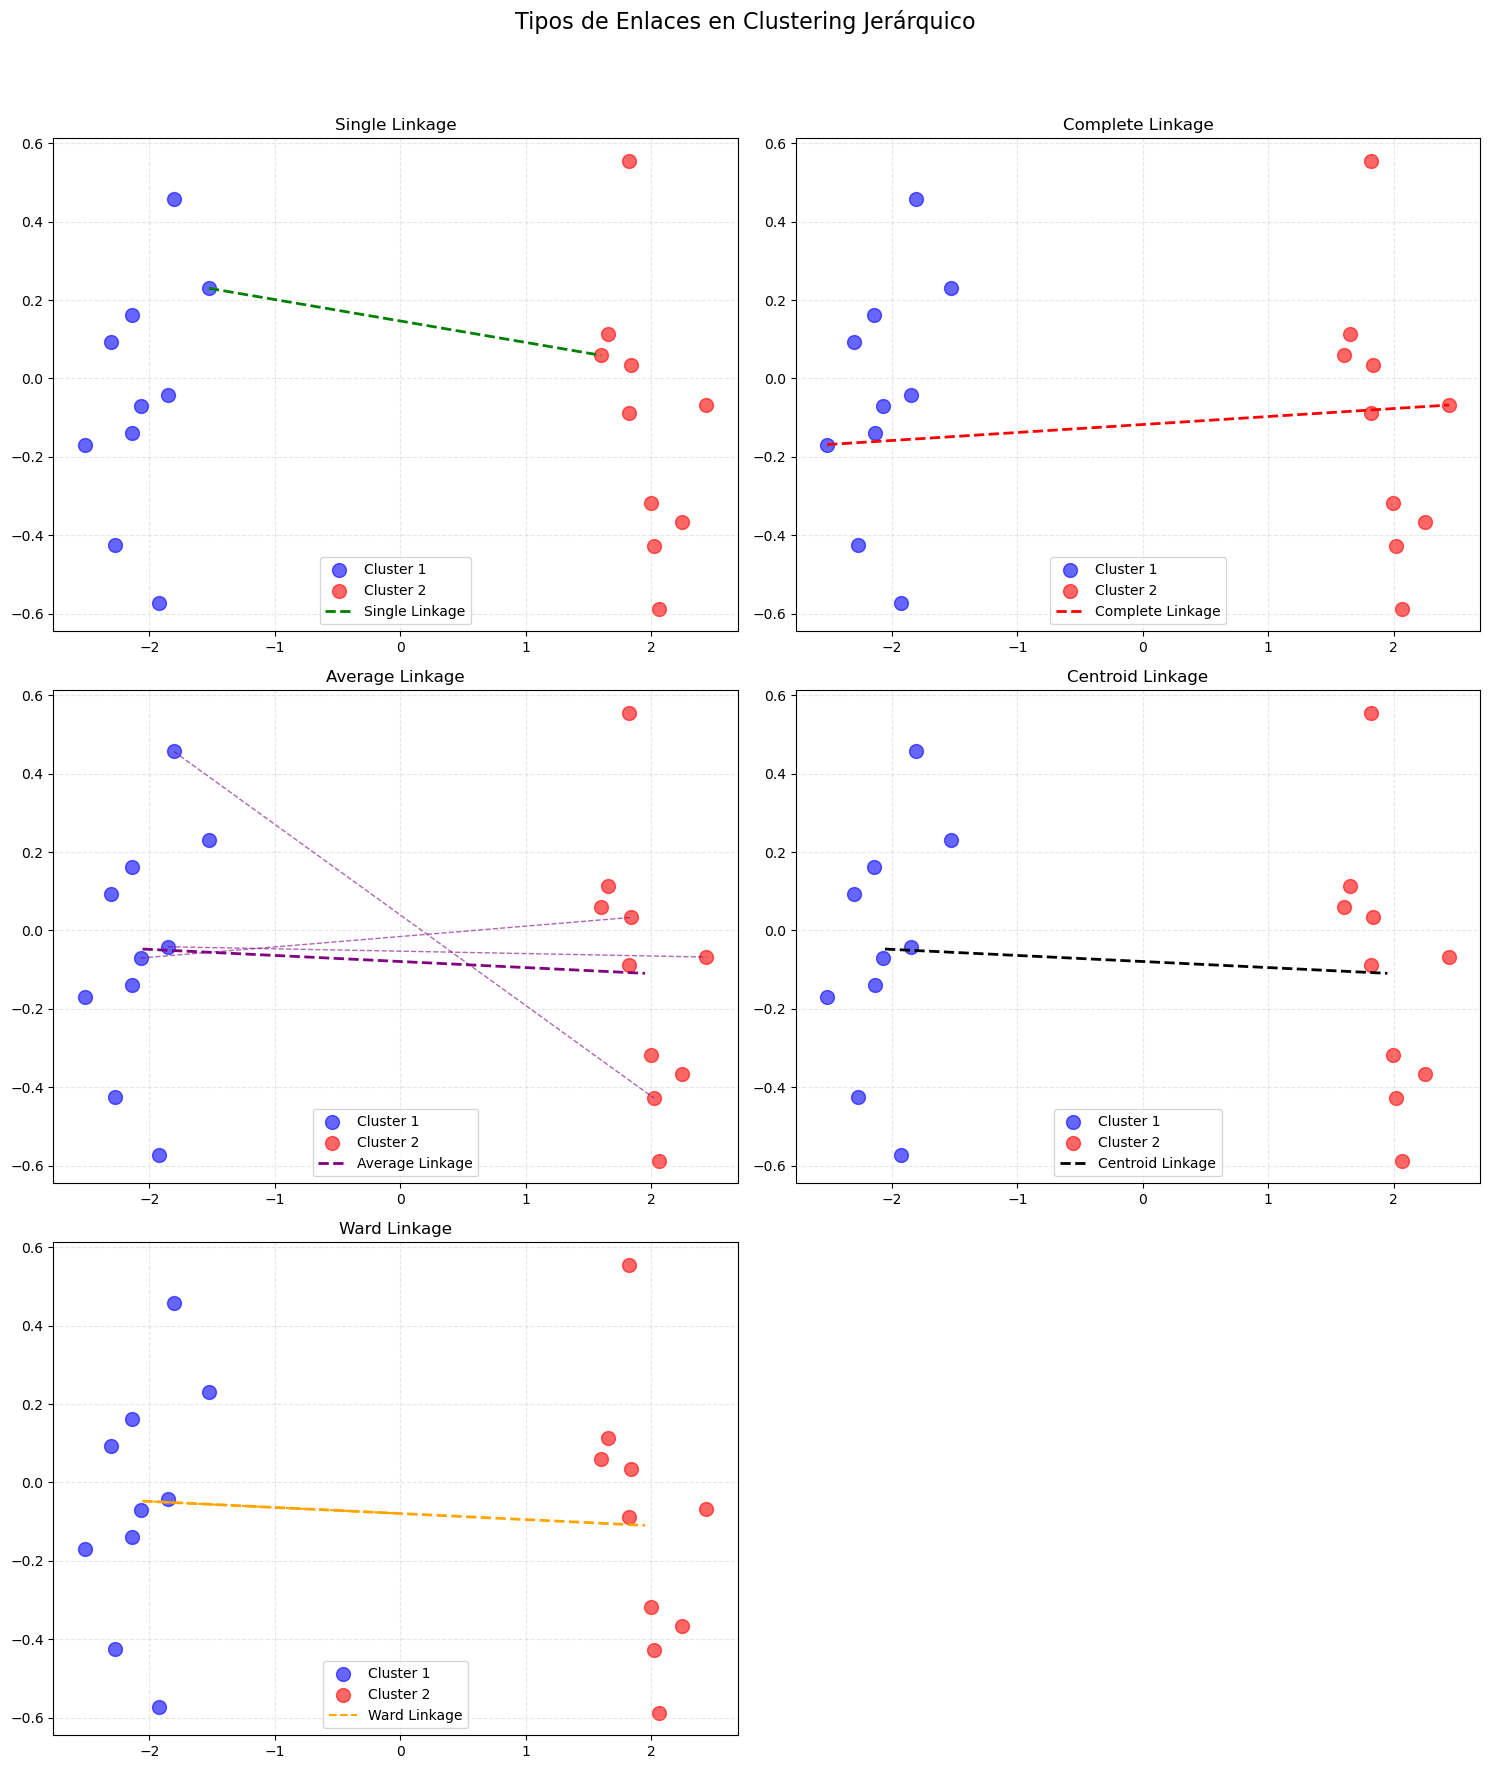

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Crear dos clusters claros y separados
np.random.seed(42)
cluster1 = np.random.normal(loc=[-2, 0], scale=0.3, size=(10, 2))
cluster2 = np.random.normal(loc=[2, 0], scale=0.3, size=(10, 2))
X = np.vstack([cluster1, cluster2])

# Calcular centroides
centroid1 = np.mean(X[:10], axis=0)
centroid2 = np.mean(X[10:], axis=0)

# Encontrar los puntos más cercanos y más lejanos entre clusters
distances = []
for i in range(10):
    for j in range(10, 20):
        dist = np.linalg.norm(X[i] - X[j])
        distances.append((dist, i, j))
min_dist = min(distances)
max_dist = max(distances)
min_points = (X[min_dist[1]], X[min_dist[2]])
max_points = (X[max_dist[1]], X[max_dist[2]])

# Graficar cada tipo de enlace en gráficos separados
fig, axs = plt.subplots(3, 2, figsize=(15, 18))
fig.suptitle('Tipos de Enlaces en Clustering Jerárquico', fontsize=16)

# Single Linkage
axs[0, 0].scatter(X[:10, 0], X[:10, 1], c='blue', label='Cluster 1', s=100, alpha=0.6)
axs[0, 0].scatter(X[10:, 0], X[10:, 1], c='red', label='Cluster 2', s=100, alpha=0.6)
axs[0, 0].plot([min_points[0][0], min_points[1][0]], 
               [min_points[0][1], min_points[1][1]], 
               'g--', linewidth=2, label='Single Linkage')
axs[0, 0].set_title('Single Linkage')
axs[0, 0].legend()
axs[0, 0].grid(True, linestyle='--', alpha=0.3)

# Complete Linkage
axs[0, 1].scatter(X[:10, 0], X[:10, 1], c='blue', label='Cluster 1', s=100, alpha=0.6)
axs[0, 1].scatter(X[10:, 0], X[10:, 1], c='red', label='Cluster 2', s=100, alpha=0.6)
axs[0, 1].plot([max_points[0][0], max_points[1][0]], 
               [max_points[0][1], max_points[1][1]], 
               'r--', linewidth=2, label='Complete Linkage')
axs[0, 1].set_title('Complete Linkage')
axs[0, 1].legend()
axs[0, 1].grid(True, linestyle='--', alpha=0.3)

# Average Linkage
axs[1, 0].scatter(X[:10, 0], X[:10, 1], c='blue', label='Cluster 1', s=100, alpha=0.6)
axs[1, 0].scatter(X[10:, 0], X[10:, 1], c='red', label='Cluster 2', s=100, alpha=0.6)
for i in range(3):  # Visualización de conexiones promedio entre pares representativos
    axs[1, 0].plot([X[i, 0], X[10 + i, 0]], [X[i, 1], X[10 + i, 1]], 'purple', linestyle='--', linewidth=1, alpha=0.6)
axs[1, 0].plot([centroid1[0], centroid2[0]], [centroid1[1], centroid2[1]], '--', color='purple', linewidth=2, label='Average Linkage')
axs[1, 0].set_title('Average Linkage')
axs[1, 0].legend()
axs[1, 0].grid(True, linestyle='--', alpha=0.3)

# Centroid Linkage
axs[1, 1].scatter(X[:10, 0], X[:10, 1], c='blue', label='Cluster 1', s=100, alpha=0.6)
axs[1, 1].scatter(X[10:, 0], X[10:, 1], c='red', label='Cluster 2', s=100, alpha=0.6)
axs[1, 1].plot([centroid1[0], centroid2[0]], 
               [centroid1[1], centroid2[1]], 
               'k--', linewidth=2, label='Centroid Linkage')
axs[1, 1].set_title('Centroid Linkage')
axs[1, 1].legend()
axs[1, 1].grid(True, linestyle='--', alpha=0.3)

# Ward Linkage
axs[2, 0].scatter(X[:10, 0], X[:10, 1], c='blue', label='Cluster 1', s=100, alpha=0.6)
axs[2, 0].scatter(X[10:, 0], X[10:, 1], c='red', label='Cluster 2', s=100, alpha=0.6)
axs[2, 0].plot([centroid1[0], centroid2[0]], [centroid1[1], centroid2[1]], '--', color='orange', linewidth=2)
axs[2, 0].plot([centroid1[0], (centroid1[0] + centroid2[0]) / 2], [centroid1[1], (centroid1[1] + centroid2[1]) / 2], 
               '--', color='orange', linewidth=1.5, label='Ward Linkage')
axs[2, 0].set_title('Ward Linkage')
axs[2, 0].legend()
axs[2, 0].grid(True, linestyle='--', alpha=0.3)

# Quitar el último subplot vacío
axs[2, 1].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


   
- Es importante señalar que, al igual que las medidas de distancia, no existe una guía en la literatura sobre cuál es el mejor método de enlace.


- La selección del método de enlace generalmente depende de las preferencias específicas del problema o disciplina, por ejemplo, el enlace centroide es popular entre los genetistas y ward entre los economistas.


- Se recomienda que se comparen varios métodos de enlace para descubrir patrones naturales de la manera más eficiente posible.


- Es importante reiterar que solo los algoritmos jerárquicos requieren la especificación de un método de vinculación, sin embargo, todos los algoritmos de agrupamiento requieren la especificación y el cálculo de una distancia entre las observaciones.

    - La medida de distancia determina cómo se definen la similitud y la diferencia en el espacio de características, mientras que el método de enlace determina cómo se unen los elementos únicos, que se convierten en grupos más grandes.

    - Se requieren medidas tanto de enlace como de distancia para el agrupamiento jerárquico, mientras que solo se requieren medidas de distancia para todas las demás técnicas de agrupamiento.

# Ejemplo: Segmentación de Clientes

In [2]:
import pandas as pd

np.set_printoptions(precision=2)

# Cargamos y vemos las primeras filas de los datos


,Id_Cliente,Genero,Edad,Ingreso,Puntaje_Gasto
0,1,Mujer,41,98115.05,39
1,2,Mujer,20,35458.14,75
2,3,Mujer,68,59872.08,55
3,4,Hombre,63,48508.93,51
4,5,Mujer,31,44431.11,54


In [3]:
# Voy solo las variables de ingreso y puntaje de gasto



array([[ 1.43, -0.43],
       [-0.96,  0.96],
       [-0.03,  0.19],
       [-0.46,  0.03],
       [-0.62,  0.15],
       [-1.36,  0.89],
       [ 0.62,  0.92],
       [-0.55,  0.34],
       [ 1.59,  0.69],
       [-1.56,  1.04],
       [ 0.65, -1.17],
       [-1.45,  0.89],
       [-0.32, -0.36],
       [ 0.76, -1.09],
       [ 0.63,  1.82],
       [-1.21,  0.42],
       [ 0.42, -1.52],
       [ 1.64,  0.73],
       [ 1.03, -1.37],
       [ 0.38,  0.3 ],
       [-0.07, -0.4 ],
       [-1.18, -0.75],
       [ 0.06, -0.36],
       [ 0.65, -1.91],
       [ 0.23, -0.4 ],
       [-0.3 , -0.16],
       [ 0.09, -0.09],
       [ 1.28, -1.41],
       [ 0.42,  0.96],
       [-1.25, -0.71],
       [-0.72,  0.07],
       [ 0.03,  0.34],
       [ 1.43,  1.47],
       [-0.45,  0.34],
       [-0.21,  0.11],
       [ 0.16, -0.01],
       [-1.8 , -0.43],
       [ 0.58, -1.48],
       [ 0.41, -0.82],
       [-0.1 , -0.16],
       [-0.81, -0.32],
       [ 2.28, -1.33],
       [-0.78, -0.86],
       [ 0.

In [ ]:


from sklearn.preprocessing import StandardScaler
# Estandarizar los datos
scaler = StandardScaler()
data_cluster_scaled = scaler.fit_transform(data_cluster)

data_cluster_scaled

### El dendograma


El dendrograma es una representación gráfica del resultado del proceso de agrupamiento en forma de árbol. La construcción es relativamente sencilla y se hace de la siguiente forma:

   1. En la parte inferior del gráfico se colocan las N observaciones iniciales.
   2. La unión de elementos se representan por tres líneas rectas. Dos líneas son perpendiculares a los elementos que se van a unir, y su altura va a estar dada por la distancia que hay entre los elementos. La tercera línea, las une.
   3. El proceso se repite hasta que todos los elementos están conectados por líneas rectas. 

Entonces cada vez que se fusionan dos elementos o clusters, el dendrograma muestra una conexión correspondiente al nivel de distancia/disimilitud en el que se produjo. Por lo tanto, si cortamos el dendrograma a un nivel de distancia dado, obtenemos un número de clusters existentes en ese nivel y los elementos que lo conforman.

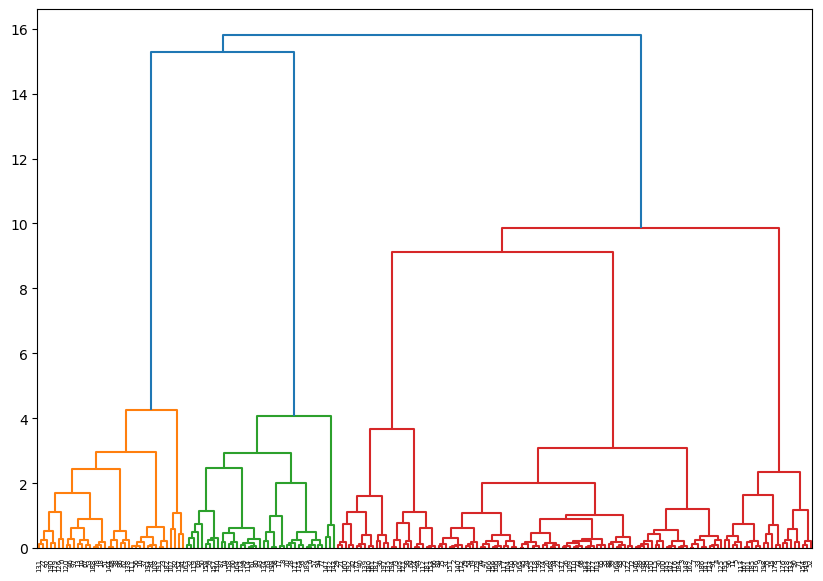

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage

import matplotlib.pyplot as plt


# Construir el dendrograma


# figura
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           labels=data_cluster.index,
           distance_sort='descending',
           show_leaf_counts=True)
plt.show()

5

,Id_Cliente,Genero,Edad,Ingreso,Puntaje_Gasto,Cluster,Cluster_Agglo
0,1,Mujer,41,98115.05,39,5,0
1,2,Mujer,20,35458.14,75,1,3
2,3,Mujer,68,59872.08,55,2,4
3,4,Hombre,63,48508.93,51,2,4
4,5,Mujer,31,44431.11,54,2,4


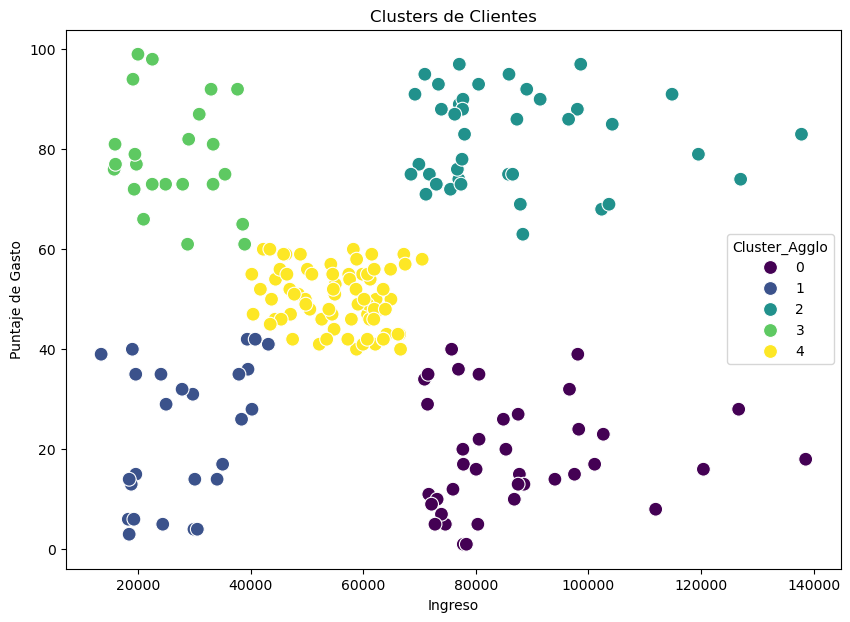

In [7]:
import seaborn as sns

# Crear un gráfico de dispersión de los datos con los clusters coloreados
plt.figure(figsize=(10, 7))
sns.scatterplot(data=data, x='Ingreso', y='Puntaje_Gasto', hue='Cluster_Agglo', palette='viridis', s=100)
plt.title('Clusters de Clientes')
plt.xlabel('Ingreso')
plt.ylabel('Puntaje de Gasto')
plt.show()

Cluster_Agglo                  0             1             2             3  \
Puntaje_Gasto mean     18.631579     23.307692     82.128205     78.565217   
              std      10.915947     13.959281      9.364489     10.953729   
Ingreso       mean  87055.074474  28274.667308  86537.496410  26230.419565   
              std   16200.102296   8998.503308  16684.184918   7742.413865   
Edad          mean     40.394737     44.115385     32.692308     25.521739   
Mujer         mean      0.473684      0.615385      0.538462      0.608696   

Cluster_Agglo                  4  
Puntaje_Gasto mean     50.216216  
              std       5.871385  
Ingreso       mean  55451.258514  
              std    7847.567060  
Edad          mean     43.594595  
Mujer         mean      0.581081

## DBSCAN

- DBSCAN (por su nombre en inglés *Density-based spatial clustering of applications with noise*) agrupa los datos en función de las densidades de las observaciones, mientras maneja el ruido de manera eficiente.  Es especialmente útil cuando tenemos datos con formas irregulares o ruido (es decir, puntos que no pertenecen a ningún grupo).

- DBSCAN  incorpora  la noción de densidad. Si hay grupos de puntos de datos que existen en el mismo vencindario, estos se pueden ver como miembros del mismo cluster.


- DBSCAN utiliza dos parámetros importantes:

- **Eps** (o radio): Imagina que tienes una lupa. Esta lupa representa un radio que puedes "poner" alrededor de cada punto.
- **minPts** (puntos mínimos): Define cuántos puntos deben estar dentro del radio para que un punto sea considerado “central” de un grupo.

### Clases de puntos en DBSCAN

Hay tres tipos de puntos en DBSCAN:

- **Punto central**: Si hay suficientes puntos (minPts) dentro del radio de un punto, este punto se convierte en un "centro de densidad" o "punto central" de un grupo.
- **Punto de borde**: Si un punto no tiene suficientes puntos en su radio para ser central, pero está dentro del radio de un punto central, es un "punto de borde". Forma parte del grupo, pero no es lo suficientemente denso para ser un centro.
- **Punto ruido**: Un punto que no tiene suficiente densidad alrededor y tampoco está en el radio de un punto central. Este punto no pertenece a ningún grupo, se considera “ruido”.

###  ¿Cómo se forma un grupo?

DBSCAN comienza eligiendo un punto al azar. Si este punto tiene suficiente densidad (es decir, tiene al menos minPts puntos dentro de su radio), se convierte en un punto central y se empieza a expandir el grupo desde ahí. Expande su "zona de influencia" a otros puntos que también tienen la densidad necesaria, conectando puntos densos hasta que no puede expandirse más.

### Identificación de ruido

Si un punto no cumple con los requisitos de densidad ni pertenece al radio de un punto central, DBSCAN lo marca como ruido y lo ignora. Estos puntos ruidosos pueden ser outliers en los datos, que no pertenecen a ningún grupo claro.

###  Ventajas de DBSCAN

- **Flexibilidad en la forma de los grupos**: A diferencia de K-means, DBSCAN no asume que los grupos son esféricos; puede manejar grupos de formas irregulares.
- **No necesita especificar el número de clusters**: Solo especificas el radio (Eps) y la densidad mínima (minPts), y DBSCAN detecta cuántos clusters hay.
- **Identificación de outliers**: Los puntos de ruido son identificados de manera automática, lo que puede ser útil en muchos contextos.


Veamos como funciona 
<div style="max-width:400px">
    <img src = "figs/DBSCAN_tutorial_1.png" />
</div>

<div style="max-width:400px">
    <img src = "figs/DBSCAN_tutorial_2.png" />
</div>

<div style="max-width:400px">
    <img src = "figs/DBSCAN_tutorial_3.png" />
</div>

<div style="max-width:400px">
    <img src = "figs/DBSCAN_tutorial_4.png" />
</div>

<div style="max-width:400px">
    <img src = "figs/DBSCAN_tutorial_5.png" />
</div>

<div style="max-width:400px">
    <img src = "figs/DBSCAN_tutorial_6.png" />
</div>

<div style="max-width:400px">
    <img src = "figs/DBSCAN_tutorial_7.png" />
</div>

<div style="max-width:400px">
    <img src = "figs/DBSCAN_tutorial_8.png" />
</div>

<div style="max-width:400px">
    <img src = "figs/DBSCAN_tutorial_9.png" />
</div>

<div style="max-width:400px">
    <img src = "figs/DBSCAN_tutorial_10.png" />
</div>

<div style="max-width:400px">
    <img src = "figs/DBSCAN_tutorial_11.png" />
</div>

<div style="max-width:400px">
    <img src = "figs/DBSCAN_tutorial_12.png" />
</div>

<div style="max-width:400px">
    <img src = "figs/DBSCAN_tutorial_14.png" />
</div>
### Todos los pasos

<div style="max-width:400px">
    <img src = "figs/DBSCAN_tutorial.gif" />
</div>


##  Incorporando más dimensiones

In [9]:
# Crear grupos etarios
bins = [17, 24, 34, 44, 54, 64, float('inf')]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
data['Grupo_Etario'] = pd.cut(data['Edad'], bins=bins, labels=labels)

# Mostrar las primeras filas con la nueva variable
data.head()

,Id_Cliente,Genero,Edad,Ingreso,Puntaje_Gasto,Cluster,Cluster_Agglo,Mujer,Grupo_Etario
0,1,Mujer,41,98115.05,39,5,0,1,35-44
1,2,Mujer,20,35458.14,75,1,3,1,18-24
2,3,Mujer,68,59872.08,55,2,4,1,65+
3,4,Hombre,63,48508.93,51,2,4,0,55-64
4,5,Mujer,31,44431.11,54,2,4,1,25-34


### ** Al margen Distancia de Gower**

Supongamos que tenemos los siguientes datos

In [10]:
import pandas as pd

# Creamos un diccionario
dictionary = {"Edad": [22, 25, 30, 38, 42, 47, 55, 62, 61, 90], 
              "Genero": ["M", "M", "F", "F", "F", "M", "M", "M", "M", "M"], 
              "Estado_Civil": ["Soltero", "Soltero", "Soltero", "Casado", "Casado", "Soltero", "Casado", "Divorciado", "Casado", "Divorciado"], 
              "Salario": [18000, 23000, 27000, 32000, 34000, 20000, 40000, 42000, 25000, 70000], 
              "tiene_hijos": [False, False, False, True, True, False, False, False, False, True], 
              "Volumen_compras": ["Bajo", "Bajo", "Bajo", "Alto", "Alto", "Bajo", "Medio", "Medio", "Medio", "Bajo"]}

# Creamos un Pandas DataFrame 
D = pd.DataFrame.from_dict(dictionary)
D

,Edad,Genero,Estado_Civil,Salario,tiene_hijos,Volumen_compras
0,22,M,Soltero,18000,False,Bajo
1,25,M,Soltero,23000,False,Bajo
2,30,F,Soltero,27000,False,Bajo
3,38,F,Casado,32000,True,Alto
4,42,F,Casado,34000,True,Alto
5,47,M,Soltero,20000,False,Bajo
6,55,M,Casado,40000,False,Medio
7,62,M,Divorciado,42000,False,Medio
8,61,M,Casado,25000,False,Medio
9,90,M,Divorciado,70000,True,Bajo




La distancia de Gower es especialmente útil en marketing porque permite trabajar con variables mixtas (numéricas y categóricas):

La distancia de Gower entre dos observaciones i y j se define como:

$d_{ij} = \frac{\sum_{k=1}^p w_k \delta_{ijk} s_{ijk}}{\sum_{k=1}^p w_k \delta_{ijk}}$

Donde:
- $s_{ijk}$ es la contribución de la variable k a la distancia total
- $w_k$ es el peso de la variable k (normalmente $w_k = 1$)
- $\delta_{ijk}$ es la variable indicadora de comparabilidad:
  - $\delta_{ijk} = 0$ si el valor es faltante para alguna de las observaciones
  - $\delta_{ijk} = 1$ si el valor está presente en ambas observaciones

Para cada tipo de variable, $s_{ijk}$ se calcula de manera diferente:

Para variables numéricas:
$s_{ijk} = \frac{|x_{ik} - x_{jk}|}{range_k}$

Para variables categóricas:
$s_{ijk} = \begin{cases} 0 & \text{si } x_{ik} = x_{jk} \\ 1 & \text{si } x_{ik} \neq x_{jk} \end{cases}$

Para variables binarias:
$s_{ijk} = \begin{cases} 0 & \text{si } x_{ik} = x_{jk} = 1 \\ 0 & \text{si } x_{ik} = x_{jk} = 0 \\ 1 & \text{en otro caso} \end{cases}$

Donde:
- $range_k$ es el rango (máximo - mínimo) de la variable k
- $x_{ik}$ es el valor de la variable k para la observación i
- $x_{jk}$ es el valor de la variable k para la observación j


Es decir:

    - Para una característica numérica, la diferencia parcial entre dos clientes i y j es la resta entre sus valores en la característica específica (en valor absoluto) dividida por el rango total de la característica. El rango de salario es 52000 (70000–18000) mientras que el rango de edad es 68 (90–22). 
    Note, hay que tener en cuenta si existen outliers o valores atípicos. Un valor erróneo extremadamente grande o pequeño afectaría directamente el rango y, por lo tanto, las diferencias en esa característica, distorsionando su importancia.

    - Para una característica categórica, la diferencia parcial entre dos clientes es uno cuando ambos clientes tienen un valor diferente para esta característica. Cero en caso contrario.
  

,Edad,Genero,Estado_Civil,Salario,tiene_hijos,Volumen_compras
0,22,M,Soltero,18000,False,Bajo
1,25,M,Soltero,23000,False,Bajo


68

0.04411764705882353

52000

0.09615384615384616

La Disimilitud de Gower entre ambos clientes es el promedio de disimilitudes parciales a lo largo de las diferentes características: 

\begin{align}
\frac{(0,044118 + 0 + 0 + 0,096154 + 0 + 0)}{ 6} = 0,023379. 
\end{align}

Como el valor es cercano a cero, podemos decir que ambos clientes son muy similares.



In [16]:
import gower

distance_matrix = gower.gower_matrix(D)
pd.DataFrame(distance_matrix)

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.023379,0.215121,0.750754,0.766968,0.067685,0.484729,0.508296,0.451357,0.666667
1,0.023379,0.000000,0.191742,0.727376,0.743590,0.063537,0.461350,0.484917,0.427979,0.643288
2,0.215121,0.191742,0.000000,0.535634,0.551848,0.230769,0.602941,0.626508,0.582391,0.784879
3,0.750754,0.727376,0.535634,0.000000,0.016214,0.727187,0.567308,0.757541,0.578808,0.749246
4,0.766968,0.743590,0.551848,0.016214,0.000000,0.723793,0.551094,0.741327,0.575415,0.733032
5,0.067685,0.063537,0.230769,0.727187,0.723793,0.000000,0.417044,0.440611,0.383673,0.598982
6,0.484729,0.461350,0.602941,0.567308,0.551094,0.417044,0.000000,0.190234,0.062783,0.681938
7,0.508296,0.484917,0.626508,0.757541,0.741327,0.440611,0.190234,0.000000,0.223605,0.491704
8,0.451357,0.427979,0.582391,0.578808,0.575415,0.383673,0.062783,0.223605,0.000000,0.715309
9,0.666667,0.643288,0.784879,0.749246,0.733032,0.598982,0.681938,0.491704,0.715309,0.000000


### **retomando** 

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

# Create a copy of the DataFrame slice to avoid the warning
data_gower = data[['Puntaje_Gasto', 'Ingreso', 'Genero', 'Grupo_Etario']].copy()

# Convert `Grupo_Etario` to string type
data_gower['Grupo_Etario'] = data_gower['Grupo_Etario'].astype(str)

# Encode categorical variables (like `Genero` and `Grupo_Etario`)
label_encoder = LabelEncoder()
data_gower['Genero'] = label_encoder.fit_transform(data_gower['Genero'])
data_gower['Grupo_Etario'] = label_encoder.fit_transform(data_gower['Grupo_Etario'])

data_gower.dtypes

Puntaje_Gasto      int64
Ingreso          float64
Genero             int64
Grupo_Etario       int64
dtype: object

In [18]:
import gower

distance_matrix = gower.gower_matrix(data_gower)

pd.DataFrame(distance_matrix)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.000000,0.317024,0.267225,0.479724,0.195525,0.533005,0.181504,0.504588,0.382437,0.353569,...,0.099865,0.386479,0.152487,0.487416,0.524295,0.291610,0.174453,0.408111,0.285238,0.114951
1,0.317024,0.000000,0.349799,0.537300,0.121499,0.326185,0.135520,0.312435,0.451502,0.036545,...,0.316888,0.624423,0.230864,0.503077,0.590945,0.089892,0.242571,0.474760,0.031786,0.202072
2,0.267225,0.349799,0.000000,0.332907,0.233402,0.565780,0.282660,0.537363,0.568029,0.386344,...,0.367090,0.574624,0.266894,0.653278,0.538703,0.324385,0.158248,0.522518,0.318013,0.254314
3,0.479724,0.537300,0.332907,0.000000,0.415800,0.253281,0.515567,0.224864,0.300937,0.573845,...,0.579589,0.287123,0.433987,0.365777,0.205795,0.511886,0.325341,0.189611,0.505514,0.487222
4,0.195525,0.121499,0.233402,0.415800,0.000000,0.337481,0.116061,0.316446,0.401431,0.158044,...,0.195389,0.502924,0.133493,0.481578,0.505301,0.096085,0.124847,0.389117,0.089713,0.187716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.291610,0.089892,0.324385,0.511886,0.096085,0.263707,0.120310,0.387022,0.426088,0.063551,...,0.291475,0.599009,0.205450,0.577663,0.545887,0.000000,0.217157,0.403908,0.106372,0.191965
196,0.174453,0.242571,0.158248,0.325341,0.124847,0.458552,0.240908,0.441293,0.526278,0.279116,...,0.274318,0.481852,0.108646,0.560506,0.380454,0.217157,0.000000,0.364270,0.210785,0.212563
197,0.408111,0.474760,0.522518,0.189611,0.389117,0.148575,0.505178,0.205563,0.290548,0.465867,...,0.487567,0.195101,0.301542,0.273755,0.141979,0.403908,0.364270,0.000000,0.455526,0.476833
198,0.285238,0.031786,0.318013,0.505514,0.089713,0.347767,0.149652,0.280649,0.435022,0.068331,...,0.285102,0.592637,0.199902,0.471291,0.571710,0.106372,0.210785,0.455526,0.000000,0.221307


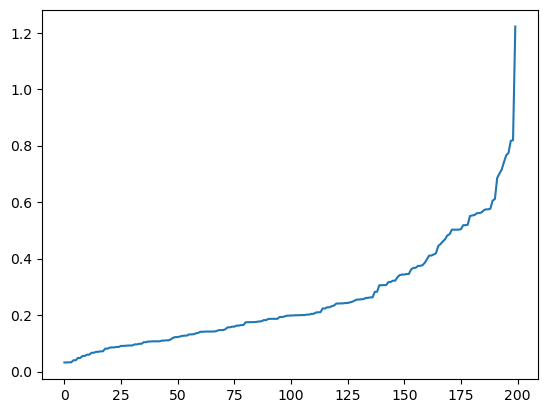

In [19]:
from kneed import KneeLocator

#Min samples
samples_gower = 2*4 # Sander et al., (1998) 2*dim

# Usar el método del codo para encontrar el valor óptimo de eps
neigh = NearestNeighbors(n_neighbors=samples_gower)
nbrs = neigh.fit(distance_matrix)
distances, indices = nbrs.kneighbors(distance_matrix)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

i = np.arange(len(distances))
knee_gower = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')


In [20]:
eps_knee=(distances[knee_gower.knee]/2).round(2)-0.08

eps_knee

0.06000000000000001

In [21]:

db = DBSCAN(eps=eps_knee, min_samples=samples_gower, metric="precomputed")

db.fit(distance_matrix)

# Asignar las etiquetas de los clusters a los datos
labels = db.labels_
data['Cluster_DBSCAN_Gower'] = labels
labels


array([-1,  0, -1, -1,  1, -1,  1,  7, -1,  0, -1, -1,  5, -1, -1, -1, -1,
        1, -1,  3,  1, -1,  1, -1,  3,  2,  1, -1,  4, -1,  3,  5,  1,  7,
        3,  1, -1, -1,  1,  3,  1, -1,  3,  1, -1,  3, -1,  1,  1,  1, -1,
       -1,  0, -1,  3,  1, -1,  1,  4,  6,  4,  1, -1,  4, -1, -1, -1, -1,
        3, -1,  4, -1,  2, -1,  7,  1,  7,  1, -1,  3,  4, -1, -1,  2, -1,
        1,  2,  1,  3,  5, -1,  5, -1,  1,  1, -1, -1, -1, -1,  5,  1,  0,
        2,  5,  1, -1, -1, -1, -1,  5,  7, -1, -1,  0,  6,  3, -1, -1,  3,
       -1, -1, -1,  3,  7, -1,  3, -1,  7, -1,  4,  1, -1, -1,  0,  4, -1,
       -1,  3,  1,  2,  1, -1,  1, -1, -1, -1,  2, -1, -1, -1,  3, -1, -1,
       -1, -1,  1,  1,  1,  6,  6, -1,  2,  3,  1,  6,  3,  7,  0,  2,  2,
        5,  1,  2,  1,  1,  6,  0,  1,  0, -1, -1, -1, -1,  1,  1, -1, -1,
        1, -1,  1, -1, -1, -1, -1, -1, -1,  3, -1,  0, -1])

In [22]:
# Describir los clusters


Cluster_DBSCAN_Gower            -1             0             1             2  \
Puntaje_Gasto mean       38.215909     77.800000     61.292683     44.818182   
              std        29.387795      8.024961     18.955532      5.827833   
Ingreso       mean    62173.972614  27016.626000  65458.609024  55517.567273   
              std     34090.059827   8594.416937  17748.788199  10525.162301   
Edad          mean       41.602273     23.100000     28.975610     49.272727   
Mujer         mean        0.465909      1.000000      1.000000      0.000000   

Cluster_DBSCAN_Gower             3             4             5             6  \
Puntaje_Gasto mean       47.650000     74.250000     50.000000     88.500000   
              std         7.835647     12.475691      6.502747      7.007139   
Ingreso       mean    55836.830500  77843.598750  55483.006250  77791.811667   
              std     10590.911666   8655.816583   8281.383344  10196.563419   
Edad          mean       48.250000     31.250000     67.750000     38.000000   
Mujer         mean        1.000000      0.000000      0.000000      0.000000   

Cluster_DBSCAN_Gower             7  
Puntaje_Gasto mean       51.875000  
              std         6.289163  
Ingreso       mean    54852.117500  
              std      6502.150989  
Edad          mean       20.375000  
Mujer         mean        0.000000

,Cluster_DBSCAN_Gower,-1,0,1,2,3,4,5,6,7
Mujer,count,88,10,41,11,20,8,8,6,8


### Tarea para la casa: Comparación con K-medias